In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from backtesting import Backtest, Strategy

In [4]:
ko = pd.read_csv('KO_2005_2025.csv')
ko = ko.rename({'Close': 'KO_Close'}, axis=1)
ko

,date,Open,High,Low,KO_Close,Adjclose,Volume,Unadjustedvolume,Change,Changepercent,Vwap,Label,Changeovertime
0,2005-02-23,12.76,12.93,12.73,12.81,6.42,7916801,7916801,0.05,0.39185,12.8075,"February 23, 05",0.003919
1,2005-02-24,12.83,12.88,12.75,12.80,6.42,5234602,5234602,-0.03,-0.23383,12.8150,"February 24, 05",-0.002338
2,2005-02-25,12.85,13.02,12.80,13.00,6.52,5376500,5376500,0.15,1.17000,12.9175,"February 25, 05",0.011700
3,2005-02-28,12.60,12.67,12.49,12.65,6.34,16898800,16898800,0.05,0.39683,12.6025,"February 28, 05",0.003968
4,2005-03-01,12.57,12.67,12.53,12.67,6.35,11681301,11681301,0.10,0.79554,12.6100,"March 01, 05",0.007955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,2025-02-14,9.43,9.51,9.39,9.48,9.18,53778335,53778335,0.05,0.53022,9.4525,"February 14, 25",0.005302
5028,2025-02-18,9.32,9.35,9.23,9.29,9.29,62175800,62175800,-0.03,-0.32189,9.2975,"February 18, 25",-0.003219
5029,2025-02-19,9.27,9.39,9.21,9.34,9.34,50191726,50191726,0.07,0.75512,9.3025,"February 19, 25",0.007551
5030,2025-02-20,9.33,9.40,9.28,9.39,9.39,39787800,39787800,0.06,0.64309,9.3500,"February 20, 25",0.006431


In [5]:
pep = pd.read_csv('PEP_2005_2025.csv')
pep = pep.rename({'Close': 'PEP_Close'}, axis=1)
pep

,date,Open,High,Low,PEP_Close,Adjclose,Volume,Unadjustedvolume,Change,Changepercent,Vwap,Label,Changeovertime
0,2010-11-18,35.00,35.99,33.89,34.19,25.76,458097664,458097664,-0.81,-2.310000,34.7675,"November 18, 10",-0.023100
1,2010-11-19,34.15,34.50,33.11,34.26,25.81,107863184,107863184,0.11,0.322110,34.0050,"November 19, 10",0.003221
2,2010-11-22,34.20,34.48,33.81,34.08,25.68,36657280,36657280,-0.12,-0.350880,34.1425,"November 22, 10",-0.003509
3,2010-11-23,33.95,33.99,33.19,33.25,25.05,31205504,31205504,-0.70,-2.060000,33.5950,"November 23, 10",-0.020600
4,2010-11-24,33.73,33.80,33.22,33.48,25.23,26147936,26147936,-0.25,-0.741180,33.5575,"November 24, 10",-0.007412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,2025-02-14,48.39,48.68,47.92,48.37,48.37,5630048,5630048,-0.02,-0.041331,48.3400,"February 14, 25",-0.000413
3582,2025-02-18,48.70,48.71,47.60,48.13,48.13,6967300,6967300,-0.57,-1.170000,48.2850,"February 18, 25",-0.011700
3583,2025-02-19,47.73,47.97,47.22,47.80,47.80,6836000,6836000,0.07,0.146660,47.6800,"February 19, 25",0.001467
3584,2025-02-20,47.79,47.91,46.76,47.89,47.89,5801818,5801818,0.10,0.209250,47.5875,"February 20, 25",0.002093


In [6]:
data_comb = ko[['date', 'KO_Close']].merge(pep[['date', 'PEP_Close']], on='date', how='left').dropna(axis=0)
data_comb

,date,KO_Close,PEP_Close
1446,2010-11-18,16.12,34.19
1447,2010-11-19,16.28,34.26
1448,2010-11-22,16.20,34.08
1449,2010-11-23,15.70,33.25
1450,2010-11-24,15.95,33.48
...,...,...,...
5027,2025-02-14,9.48,48.37
5028,2025-02-18,9.29,48.13
5029,2025-02-19,9.34,47.80
5030,2025-02-20,9.39,47.89


In [7]:
def minmax_scale(series):
    return (series - series.min()) / (series.max() - series.min())

In [8]:
data_comb['KO_Close_scaled'] = minmax_scale(data_comb['KO_Close'])
data_comb['PEP_Close_scaled'] = minmax_scale(data_comb['PEP_Close'])
data_comb

,date,KO_Close,PEP_Close,KO_Close_scaled,PEP_Close_scaled
1446,2010-11-18,16.12,34.19,0.571766,0.355333
1447,2010-11-19,16.28,34.26,0.579320,0.356763
1448,2010-11-22,16.20,34.08,0.575543,0.353085
1449,2010-11-23,15.70,33.25,0.551936,0.336126
1450,2010-11-24,15.95,33.48,0.563739,0.340826
...,...,...,...,...,...
5027,2025-02-14,9.48,48.37,0.258263,0.645076
5028,2025-02-18,9.29,48.13,0.249292,0.640172
5029,2025-02-19,9.34,47.80,0.251653,0.633429
5030,2025-02-20,9.39,47.89,0.254013,0.635268


<Axes: ylabel='KO_Close_scaled'>

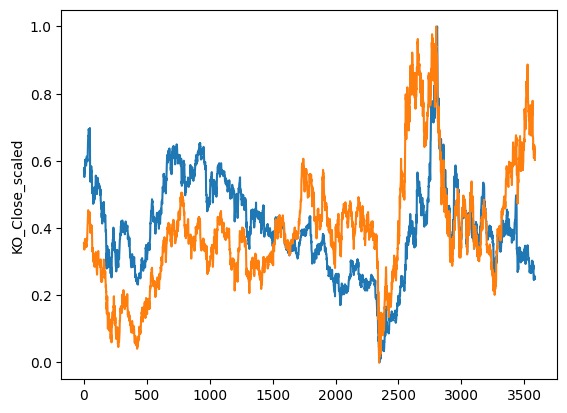

In [9]:
sns.lineplot(data_comb, x=range(len(data_comb)), y='KO_Close_scaled')
sns.lineplot(data_comb, x=range(len(data_comb)), y='PEP_Close_scaled')

In [10]:
def calculate_spread_zscore(series1, series2):
    hedge_ratio = np.polyfit(series2, series1, 1)[0]
    spread = series1 - hedge_ratio * series2
    zscore = (spread - spread.mean()) / spread.std()
    return spread, zscore

In [11]:
spread, zscore = calculate_spread_zscore(data_comb['KO_Close'], data_comb['PEP_Close'])
data_comb['spread'] = spread
data_comb['z-score'] = zscore
data_comb

,date,KO_Close,PEP_Close,KO_Close_scaled,PEP_Close_scaled,spread,z-score
1446,2010-11-18,16.12,34.19,0.571766,0.355333,12.453474,1.380381
1447,2010-11-19,16.28,34.26,0.579320,0.356763,12.605967,1.434890
1448,2010-11-22,16.20,34.08,0.575543,0.353085,12.545270,1.413194
1449,2010-11-23,15.70,33.25,0.551936,0.336126,12.134279,1.266284
1450,2010-11-24,15.95,33.48,0.563739,0.340826,12.359614,1.346831
...,...,...,...,...,...,...,...
5027,2025-02-14,9.48,48.37,0.258263,0.645076,4.292814,-1.536657
5028,2025-02-18,9.29,48.13,0.249292,0.640172,4.128552,-1.595373
5029,2025-02-19,9.34,47.80,0.251653,0.633429,4.213941,-1.564851
5030,2025-02-20,9.39,47.89,0.254013,0.635268,4.254290,-1.550428


<Axes: ylabel='spread'>

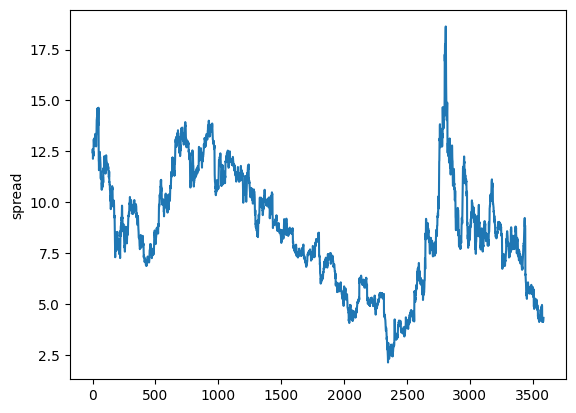

In [12]:
sns.lineplot(data_comb, x=range(len(data_comb)), y='spread')

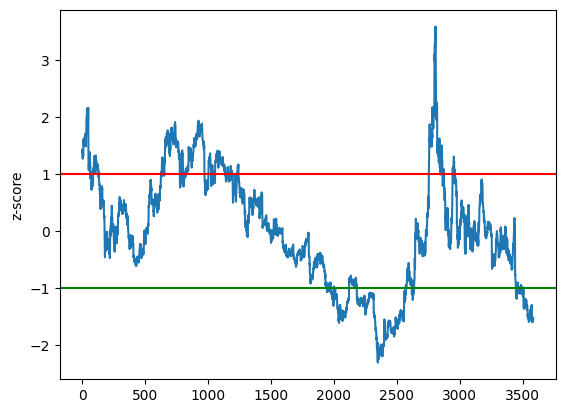

In [13]:
sns.lineplot(data_comb, x=range(len(data_comb)), y='z-score')
plt.axhline(y=1, color='red')
plt.axhline(y=-1, color='green')

In [14]:
backtest_data = data_comb[['date', 'spread', 'z-score']].rename({'spread': 'Close'}, axis=1)
backtest_data

,date,Close,z-score
1446,2010-11-18,12.453474,1.380381
1447,2010-11-19,12.605967,1.434890
1448,2010-11-22,12.545270,1.413194
1449,2010-11-23,12.134279,1.266284
1450,2010-11-24,12.359614,1.346831
...,...,...,...
5027,2025-02-14,4.292814,-1.536657
5028,2025-02-18,4.128552,-1.595373
5029,2025-02-19,4.213941,-1.564851
5030,2025-02-20,4.254290,-1.550428


In [15]:
# provide necessary backtest columns
backtest_data['Open'] = backtest_data['Close']
backtest_data['High'] = backtest_data['Close']
backtest_data['Low'] = backtest_data['Close']

In [16]:
class PairsTradeStrat(Strategy):
    tp = 0.1
    sl = 0.05
    
    min_z_score_long = -1
    max_z_score_short = 1
    
    def init(self):
        ...
        
    def next(self):
        
        current_spread = self.data.Close[-1]
        current_z_score = self.data['z-score'][-1]
        previous_z_score = self.data['z-score'][-2]
        
        if previous_z_score < self.min_z_score_long and current_z_score > self.min_z_score_long: # Z-score has crossed over
            self.buy(tp=current_spread * (1 + self.tp), sl=current_spread * (1 - self.sl))
        
        elif previous_z_score > self.max_z_score_short and current_z_score < self.max_z_score_short: # Z-score has crossed over
            self.sell(tp=current_spread * (1 - self.tp), sl=current_spread * (1 + self.sl))
        

In [21]:
bt = Backtest(backtest_data, PairsTradeStrat, cash=100_000, commission=.004, margin=1/5, exclusive_orders=True, hedging=False)

In [18]:
# stats = bt.optimize(
#     min_z_score_long=[-0.1, -0.25, -0.5, -0.75, -1, -1.5, -2, -2.5, -3],
#     max_z_score_short=[0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 2.5, 3],
#     tp=[0.0025, 0.005, 0.01, 0.025, 0.05, 0.1],
#     sl=[0.0025, 0.005, 0.01, 0.025, 0.05, 0.1],
#     constraint=lambda p: p.tp > p.sl,
#     max_tries=2000,
#     random_state=5
# )
# stats

In [22]:
best_params = {'min_z_score_long': -0.75, 'max_z_score_short': 0.25, 'tp': 0.05, 'sl': 0.025}
bt.run(**best_params)

Start                                  1446.0
End                                    5031.0
Duration                               3585.0
Exposure Time [%]                    3.234802
Equity Final [$]                 955638.15919
Equity Peak [$]                  955638.15919
Return [%]                         855.638159
Buy & Hold Return [%]              -65.344022
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -56.238531
Avg. Drawdown [%]                  -14.016452
Max. Drawdown Duration                 1718.0
Avg. Drawdown Duration             146.333333
# Trades                                 31.0
Win Rate [%]                         54.83871
Best Trade [%]                      10.066085
Worst Trade [%]                    -10.283229
Avg. Trade [%]                    